In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Warm up

## Discrete Fourier Transform Function

In [2]:
def DFT(signal):
    N = len(signal) # number of points in the signal
    k = N # a separate counter for the number of frequencies to test
    elements = [0]*k # initialize results signal
    j = 0
    for j in range(k):
        n = 0
        for n in range(N):
            elements[j] += signal[n]*cmath.exp(complex(0,-2*np.pi*j*n/N))
    return elements

## Inverse Discrete Fourier Transform Function

In [3]:
def IDFT(elements):
    k = len(elements)
    N = k
    signal = [0]*N
    for n in range(N):
        j = 0
        for j in range(k):
            signal[n] += 1/N * elements[j]*cmath.exp(complex(0,2*np.pi*j*n/N))
    return signal


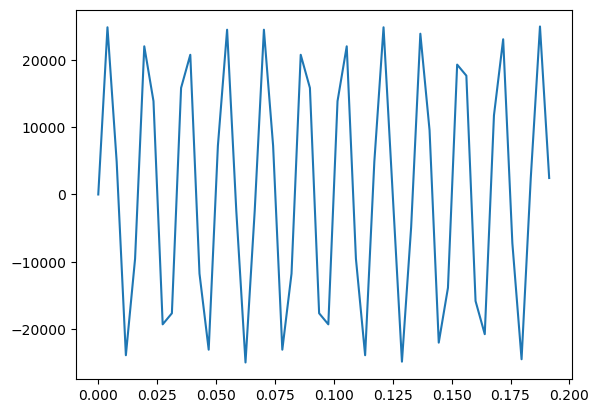

In [4]:
# Sample sin wave
fsamp = 256
Tsamp = 1/fsamp

A = 25000
f = 60
T = 1/f
cycles = 100

t = np.arange(0,cycles*T,Tsamp) # plot from 0 to 20 cycles of the 50Hz signal 
x = A*np.sin(2*np.pi*f*t)

plt.plot(t[0:50],x[0:50])

Text(0, 0.5, 'Amplitude')

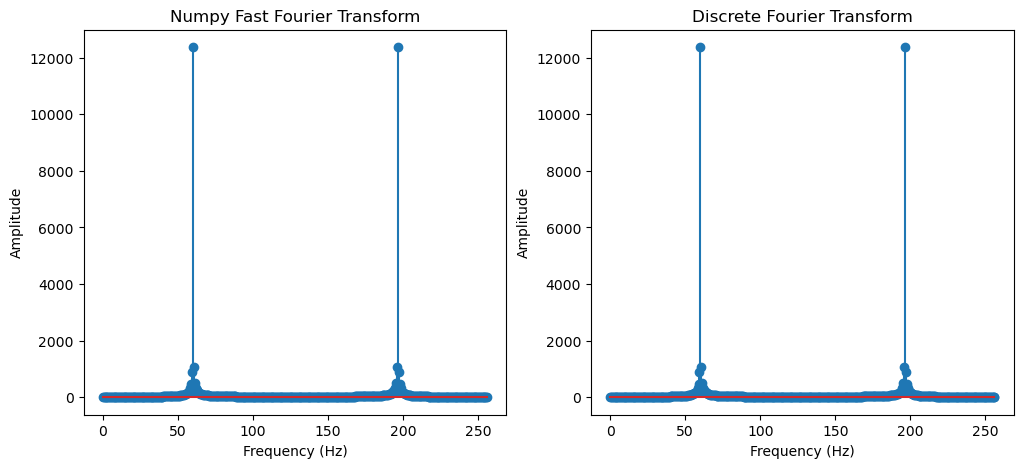

In [5]:
fft = np.fft.fft(x)
N = len(x)
freqs = np.linspace(0, fsamp, N)

mydft = DFT(x)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
ax[0].stem(freqs, np.abs(fft)/N)
ax[0].set_title('Numpy Fast Fourier Transform')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[1].stem(freqs, np.abs(mydft)/N)
ax[1].set_title('Discrete Fourier Transform')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

c:\Users\georg\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


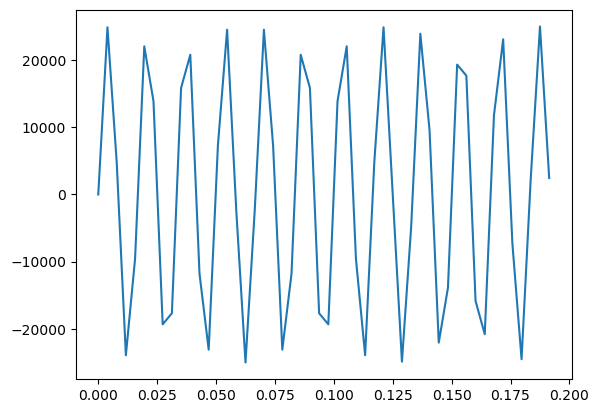

In [6]:
plt.plot(t[:50], IDFT(mydft)[:50])

Text(0, 0.5, 'Amplitude')

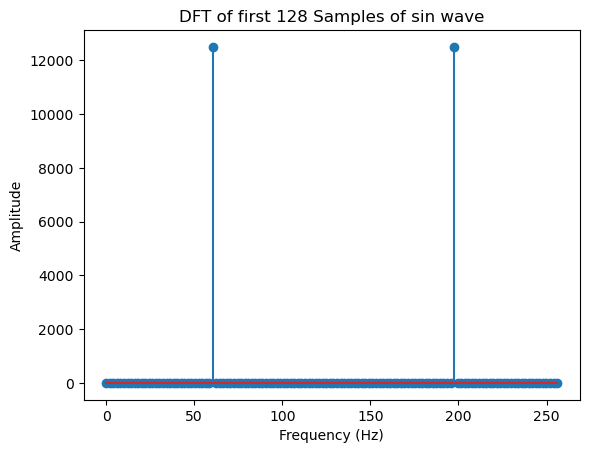

In [7]:
dft128 = DFT(x[:128])
N = len(x[:128])
freqs = np.linspace(0, fsamp, N)

plt.stem(freqs, np.abs(dft128)/N)
plt.title('DFT of first 128 Samples of sin wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

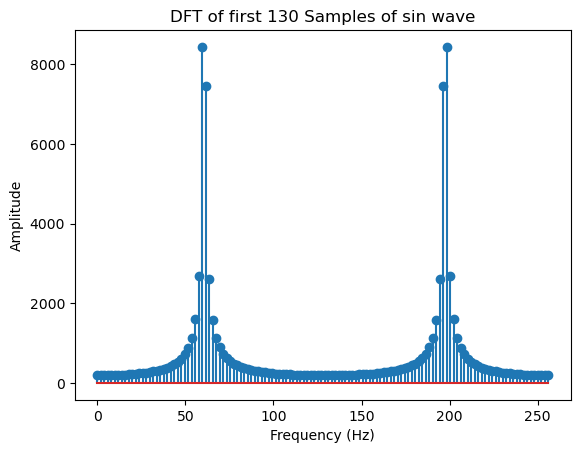

In [8]:
dft130 = DFT(x[:130])
N = len(x[:130])
freqs = np.linspace(0, fsamp, N)

plt.stem(freqs, np.abs(dft130)/N)
plt.title('DFT of first 130 Samples of sin wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

In the 128 sample DFT, the frequency range is divided into 128 parts, which is exactly half of the sampling frequency (256Hz). This means that when the DFT function sweeps the frequencies, the tested frequencies are all whole, even numbers, and one of them is exactly 60Hz (and 256-60 for the mirrored side ofthe spectrum), which will return the highest possible amplitude value.

However, for the 130 sample DFT, the sample number, N, and the frequency range no longer match so nicely, resulting in the testing of a bunch of frequencies near 60Hz whose contributions will sum up to the original amplitude of the wave. The almost smooth curve up to the peak is because 130 is relatively close to 128.

Text(0, 0.5, 'Amplitude')

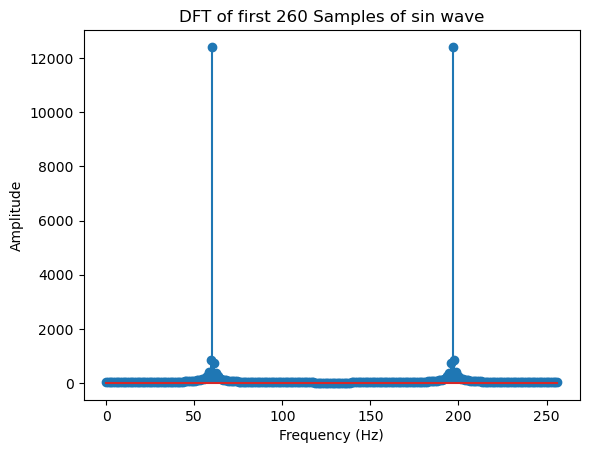

In [9]:
dft260 = DFT(x[:260])
N = len(x[:260])
freqs = np.linspace(0, fsamp, N)

plt.stem(freqs, np.abs(dft260)/N)
plt.title('DFT of first 260 Samples of sin wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

The 260 sample DFT performs much better than the 130 sample because the smaller increments between tested frequencies means that there is a much higher chance that one of the freqiencies will be extremely close to 60Hz, thus having a significantly greater contribution than any other frequency. For the 130 sample DFT, the nearest frequencies were 59.077Hz and 61.046Hz, which are about equally far from 60Hz, resulting in the two nearly equal peaks who are forced to "share" the contribution to the original signal.

Meanwhile the 260 sample DFT has one very tall peak at 60.167Hz, and the next closest tested frequencies are 59.733Hz and 60.587Hz.

## Discrete Time Fourier Transform

Text(0, 0.5, 'Amplitude')

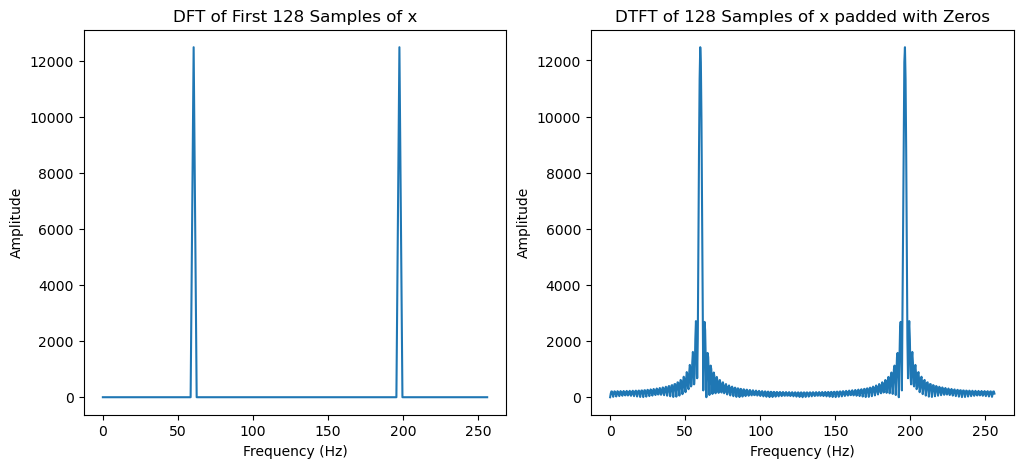

In [10]:
N = len(x[:128])
freqs = np.linspace(0, fsamp, N)

# Padding 128 sampled of x with 500 0s
paddedx = np.concatenate((x[:128],[0]*500))

#comparing DTFT of paddedx with original DFT of 128 samples of x
dtft = DFT(paddedx)
dtftfreqs = np.linspace(0,256,628)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
ax[0].plot(freqs, np.abs(dft128)/N)
ax[0].set_title('DFT of First 128 Samples of x')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(dtftfreqs, np.abs(dtft)/N)
ax[1].set_title('DTFT of 128 Samples of x padded with Zeros')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

The DTFT has the same maximum peak height, but frequencies around the actual signal frequency are also given nonzero amplitude values that seem to oscillate.

### Windowing the signal

#### Defining a Window function

In [11]:
def window(type, N):
    '''type(str): specify the type of window to be generated - Square, Hanning, Hamming, Blackman'''
    '''N(int): specify the width of the window by number of data points'''

    hn = [0]*N

    i = -N//2+1
    ii = 0
    '''The formula used depends on the specified window type, and is then applied across the length of the resulting window'''
    if type == 'Square':
        for ii in range(N):
            hn[ii] = 1
    
    elif type == 'Hanning':
        for ii in range(N):
            i = ii - N//2+1 # a separate counter to shift the window function for correct indexing
            hn[ii] = 0.5 + 0.5*np.cos(2*np.pi*i/(N-1)) # Hanning Window function

    elif type == 'Hamming':
        for ii in range(N):
            i = ii - N//2+1
            hn[ii] = 0.54 + 0.46*np.cos(2*np.pi*i/(N-1)) # Hamming Window function

    elif type == 'Blackman':
        for ii in range(N):
            i = ii - N//2+1
            hn[ii] = 0.5 + 0.5*np.cos(2*np.pi*i/(N-1)) + 0.08*np.cos(4*np.pi*i/(N-1)) # Blackman Window function
    
    return hn

#### Applying Windows, Padding, and taking the DTFTs

Text(0, 0.5, 'Amplitude')

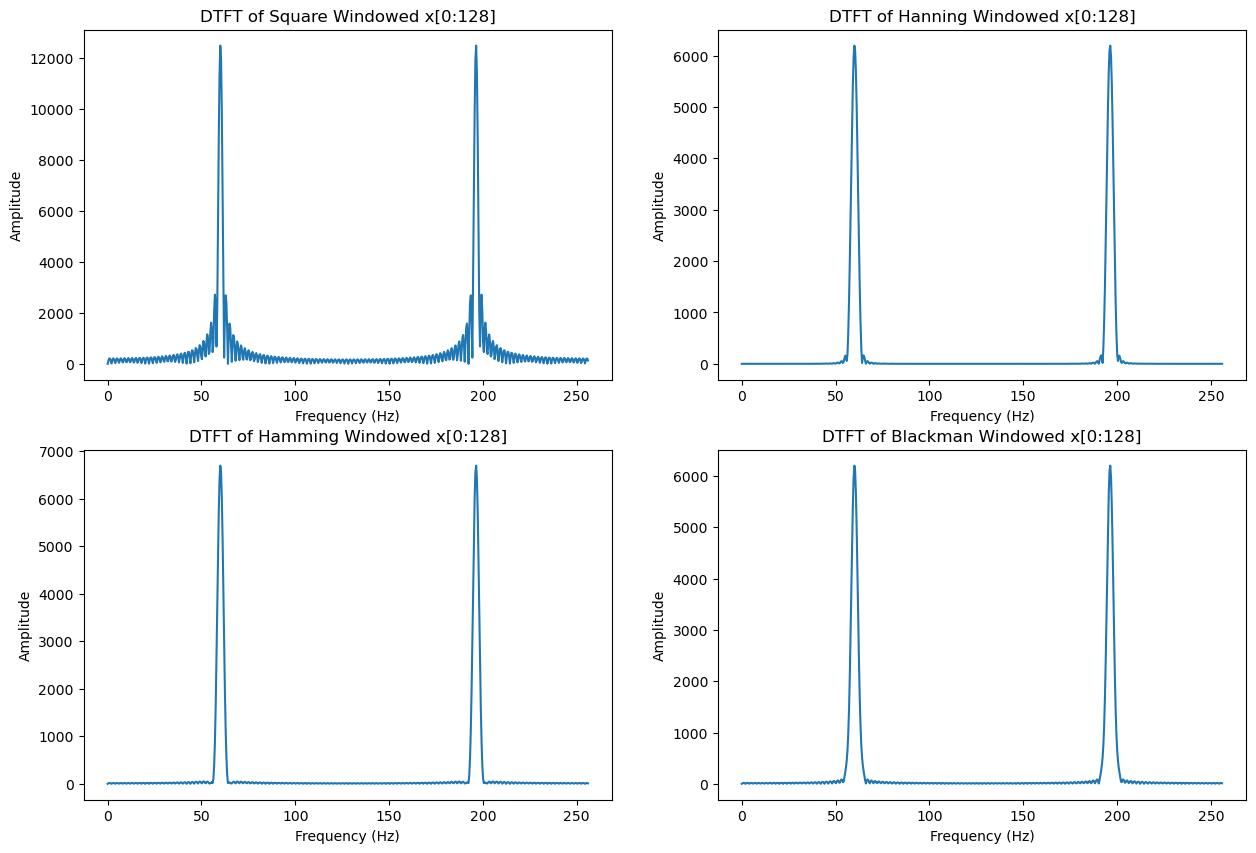

In [12]:
# applying the windows
sqwindowed = x[:128]*window('Square', len(x[:128]))
paddedsquare = np.concatenate((sqwindowed, [0]*500))

hanwindowed = x[:128]*window('Hanning', len(x[:128]))
paddedhan = np.concatenate((hanwindowed, [0]*500))

hamwindowed = x[:128]*window('Hamming', len(x[:128]))
paddedham = np.concatenate((hamwindowed, [0]*500))

blackwindowed = x[:128]*window('Blackman', len(x[:128]))
paddedblack = np.concatenate((blackwindowed, [0]*500))

# Taking the DTFTs
dtftfreqs = np.linspace(0,256,628)

dtftsquare = DFT(paddedsquare)
dtfthan = DFT(paddedhan)
dtftham = DFT(paddedham)
dtftblack = DFT(paddedblack)

# plotting each windowed version of the padded sample
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
ax[0,0].plot(dtftfreqs, np.abs(dtftsquare)/N)
ax[0,0].set_title('DTFT of Square Windowed x[0:128]')
ax[0,0].set_xlabel('Frequency (Hz)')
ax[0,0].set_ylabel('Amplitude')
ax[0,1].plot(dtftfreqs, np.abs(dtfthan)/N)
ax[0,1].set_title('DTFT of Hanning Windowed x[0:128]')
ax[0,1].set_xlabel('Frequency (Hz)')
ax[0,1].set_ylabel('Amplitude')
ax[1,0].plot(dtftfreqs, np.abs(dtftham)/N)
ax[1,0].set_title('DTFT of Hamming Windowed x[0:128]')
ax[1,0].set_xlabel('Frequency (Hz)')
ax[1,0].set_ylabel('Amplitude')
ax[1,1].plot(dtftfreqs, np.abs(dtftblack)/N)
ax[1,1].set_title('DTFT of Blackman Windowed x[0:128]')
ax[1,1].set_xlabel('Frequency (Hz)')
ax[1,1].set_ylabel('Amplitude')

# Averaging DFTs

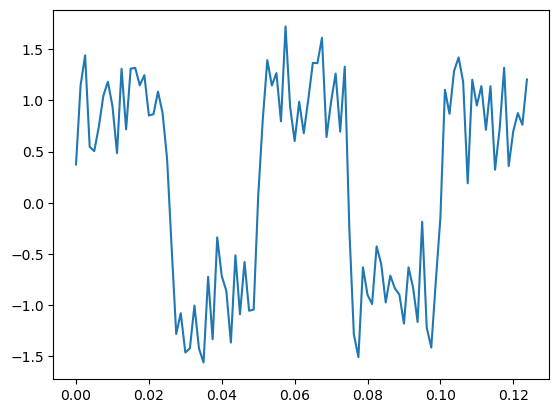

In [13]:
# generate a noisy square wave
fsamp = 800
Tsamp = 1/fsamp

f = 20
T = 1/f
cycles = 300

t = np.arange(0,cycles*T,Tsamp) # plot from 0 to 20 cycles of the 50Hz signal 
x = [0]*len(t)
for i in range(len(t)):
    for k in range(1,8):
        x[i] += 4/np.pi * np.sin(2*np.pi*(2*k-1)*f*t[i])/(2*k-1)
    x[i] += np.random.normal(0,0.3)

plt.plot(t[0:100],x[0:100])

In [14]:
len(x)

12000

In [15]:
segment = np.split(np.array(x), 10) # split noisy square wave into 10 segments

DFTstack = np.zeros((10,1200), dtype = 'complex')
cmath
N = len(segment[0])
freq = np.linspace(0, 800, N)

for i in range(10):
    DFTstack[i] = DFT(segment[i])

Text(0, 0.5, 'Amplitude')

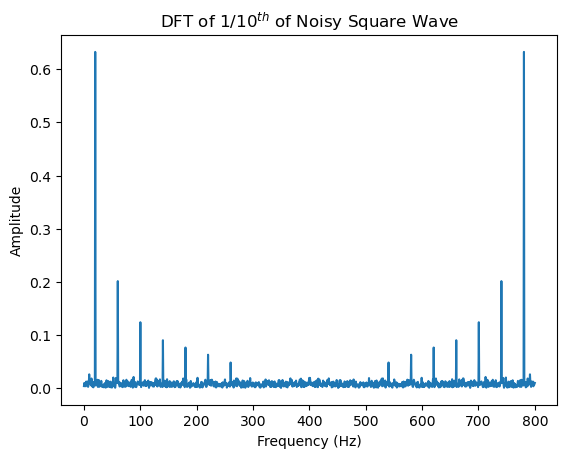

In [16]:
plt.plot(freq, np.abs(DFTstack[3])/N)
plt.title('DFT of 1/10$^{th}$ of Noisy Square Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

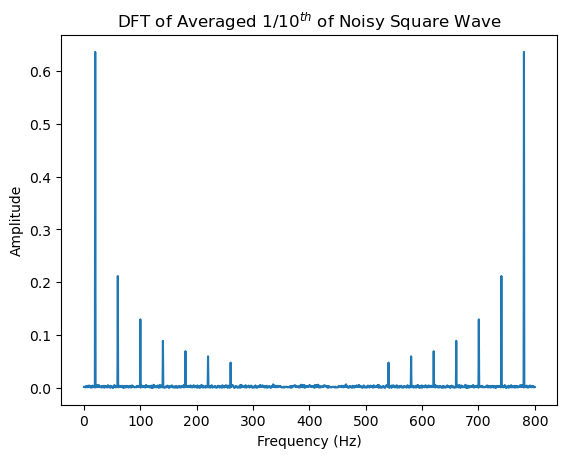

In [17]:
DFTstacked = DFTstack.mean(axis = 0)

plt.plot(freq, np.abs(DFTstacked)/N)
plt.title('DFT of Averaged 1/10$^{th}$ of Noisy Square Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

The averaged DFT plot has greatly reduced noise, but the detected frequency peaks have the same amplitude.

c:\Users\georg\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Amplitude')

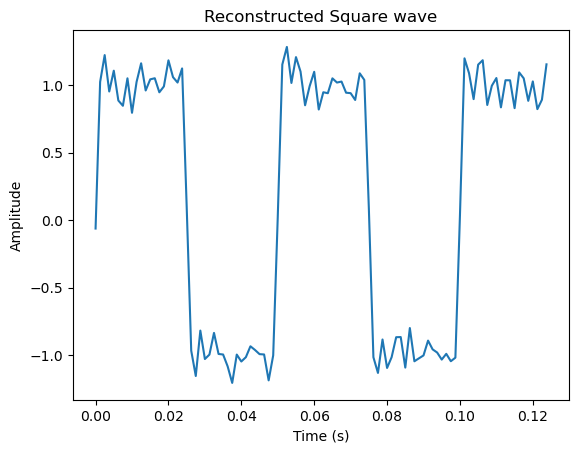

In [18]:
plt.plot(t[:100], IDFT(DFTstacked)[:100])
plt.title('Reconstructed Square wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Convolution in the Frequency Domain

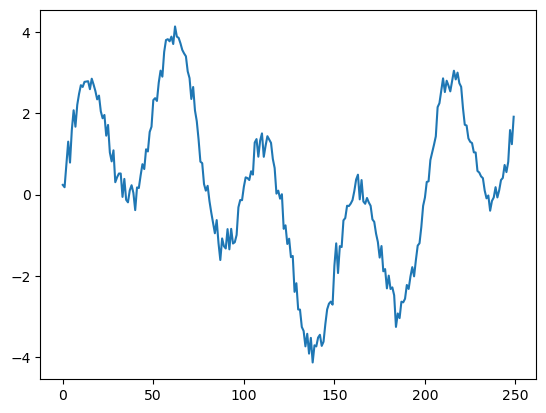

In [20]:
# reference wave

A=2
f=50.0
T=1/f

fs=50*f
Ts=1/fs
cycles=5

t=np.arange(0,cycles*T,Ts)

i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(.5*np.pi*f*t[i])+np.random.normal(0,.2)
    i+=1

plt.plot(x)
plt.show()

Imported sinc window generator functions from Lab 2

In [36]:
def losinc(size):
    '''size must be an odd integer'''
    impres_lopass = [0]*size # define width of the impulse reponse
    
    i = 0
    for i in range(size): # sinc values inserted, and graph is shifted so that the output is a horizontally symmetrical array
        impres_lopass[i] = np.sinc((i-size//2)/np.pi)
        
    storesum = sum(impres_lopass)
    i = 0
    for i in range(size): # normalize values
        impres_lopass[i] = impres_lopass[i]/storesum
    
    return impres_lopass


def hisinc(size):
    '''size must be an odd integer'''
    impres_hipass = [0]*size # define width of the impulse reponse
    
    i = 0
    tysum=0
    for i in range(size): # sinc values inserted, and graph is shifted so that the output is a horizontally symmetrical array
        impres_hipass[i] = -np.sinc((i-size//2)/np.pi)
    
    storesum = sum(impres_hipass[0:(size//2)])+sum(impres_hipass[(size//2)+1:size+1]) # array is normalized to zero
    impres_hipass[size//2] = -storesum
    
    return impres_hipass

## Applying sinc window filter via convolution

Text(0, 0.5, 'Amplitude')

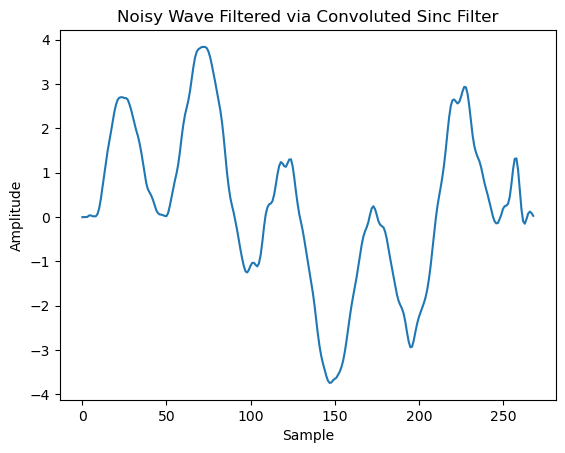

In [40]:
sinc = losinc(20)

plt.plot(np.convolve(x, sinc))
plt.title('Noisy Wave Filtered via Convoluted Sinc Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

Applying DFT to sinc and x then applying IDFT

Text(0, 0.5, 'Amplitude')

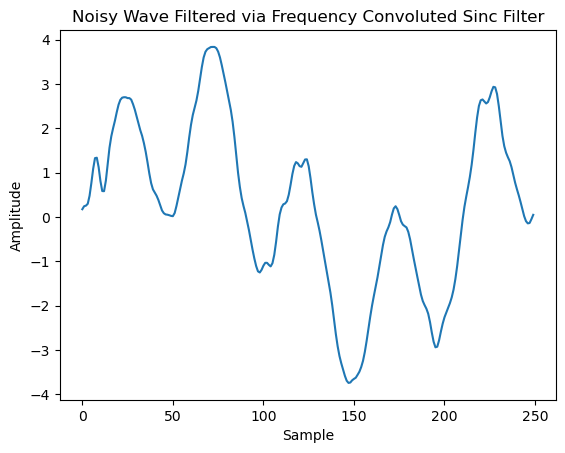

In [49]:
padsinc = sinc + [0]*(len(x)-len(sinc))
dftsinc = np.array(DFT(padsinc))

dftsignal = np.array(DFT(x))

DFTconvolve = dftsignal * dftsinc

plt.plot(IDFT(DFTconvolve))
plt.title('Noisy Wave Filtered via Frequency Convoluted Sinc Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

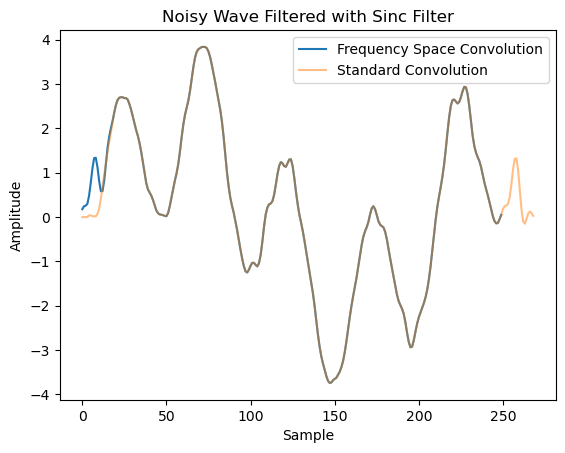

In [55]:
# overlay the filtered waves
plt.plot(IDFT(DFTconvolve), label = 'Frequency Space Convolution')
plt.plot(np.convolve(x, sinc, mode = 'full'), alpha = 0.5, label = 'Standard Convolution')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Noisy Wave Filtered with Sinc Filter')
plt.legend()
plt.show()

The majority of both filtered waves is the same, but the ends are slightly different due to the convolution function operating the filter upon the signal differently than the multiplication of the DFTs.

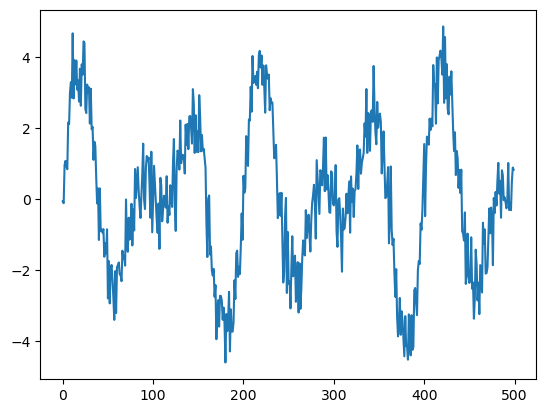

In [56]:
# generating another sin wave

A=2
f=50.0
T=1/f

fs=100*f
Ts=1/fs
cycles=5

t=np.arange(0,cycles*T,Ts)

i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(3*np.pi*f*t[i])+np.random.normal(0,.6)
    i+=1

plt.plot(x)
plt.show()

Text(0, 0.5, 'Amplitude')

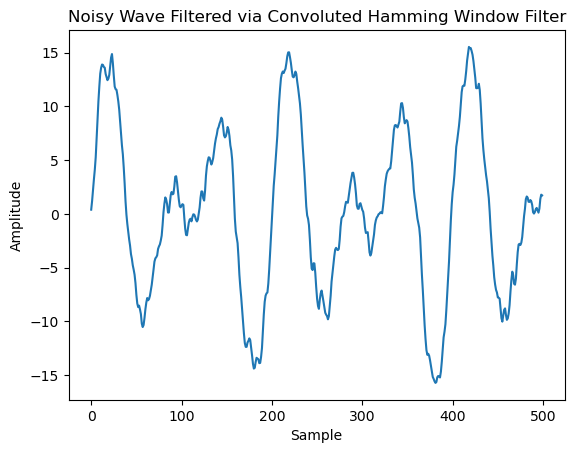

In [64]:
hamwin = window('Hamming', 8)

hamconv = np.convolve(x, hamwin, mode = 'same')

plt.plot(hamconv)
plt.title('Noisy Wave Filtered via Convoluted Hamming Window Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

The Hamming window acts as a pretty decent lowpass filter for the signal, x.

Applying DFT to Hamming window and x then applying IDFT

500 500


c:\Users\georg\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Amplitude')

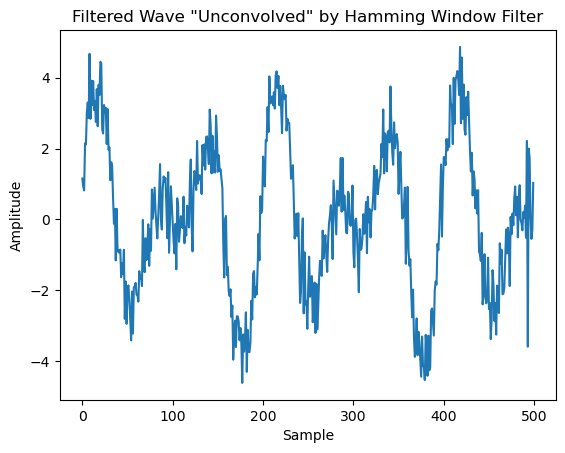

In [65]:
padham = hamwin + [0]*(len(x)-len(hamwin))
dftham = np.array(DFT(padham))

dfthamconv = np.array(DFT(hamconv))
print(len(dftham), len(dfthamconv))
DFTunconvolve = dfthamconv / dftham

plt.plot(IDFT(DFTunconvolve))
plt.title('Filtered Wave "Unconvolved" by Hamming Window Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

c:\Users\georg\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


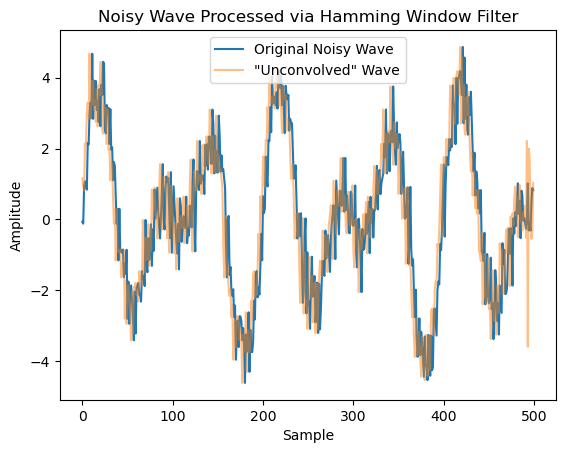

In [66]:
# overlay the filtered waves
plt.plot(x, label = 'Original Noisy Wave')
plt.plot(IDFT(DFTunconvolve), alpha = 0.5, label = '"Unconvolved" Wave')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Noisy Wave Processed via Hamming Window Filter')
plt.legend()
plt.show()

The noise profiles match very closely between the original signal and the filtered then unfiltered wave. The shift this time is due to the fact that I had to set the convolution mode as 'same'.